#Very simple autoencoder
https://gist.github.com/tomokishii/7ddde510edb1c4273438ba0663b26fc6

In [2]:
#SimpleOne

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:22: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.4/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.4/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.4/dist-packages/

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...
  step, loss =      0:  0.723
  step, loss =   1000:  0.263
  step, loss =   2000:  0.261
  step, loss =   3000:  0.241
  step, loss =   4000:  0.234
  step, loss =   5000:  0.216
  step, loss =   6000:  0.208
  step, loss =   7000:  0.197
  step, loss =   8000:  0.194
  step, loss =   9000:  0.193
  step, loss =  10000:  0.183
loss (test) =  0.179576


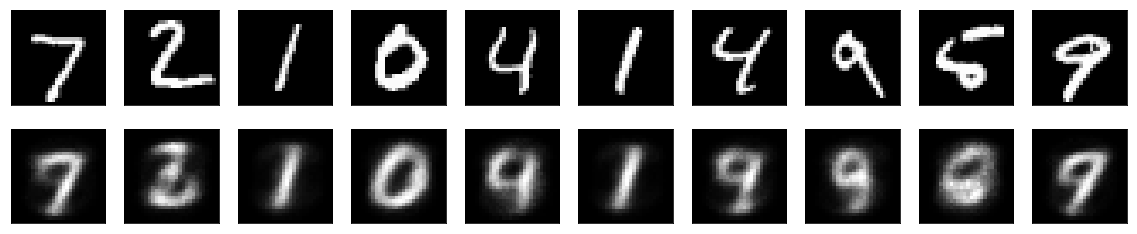

In [3]:
#
#   mnist_ae1.py   date. 7/4/2016
#   
#   Autoencoder tutorial code
#
#required imports
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
 
import matplotlib as mpl
mpl.use('Agg')
 
 

# Import data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

# Variables
x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])

w_enc = tf.Variable(tf.random_normal([784, 625], mean=0.0, stddev=0.05))
w_dec = tf.Variable(tf.random_normal([625, 784], mean=0.0, stddev=0.05))
# w_dec = tf.transpose(w_enc) # if you use tied weights
b_enc = tf.Variable(tf.zeros([625]))
b_dec = tf.Variable(tf.zeros([784]))

# Create the model
def model(X, w_e, b_e, w_d, b_d):
    encoded = tf.sigmoid(tf.matmul(X, w_e) + b_e)
    decoded = tf.sigmoid(tf.matmul(encoded, w_d) + b_d)
    
    return encoded, decoded

encoded, decoded = model(x, w_enc, b_enc, w_dec, b_dec)

# Cost Function basic term
cross_entropy = -1. * x * tf.log(decoded) - (1. - x) * tf.log(1. - decoded)
loss = tf.reduce_mean(cross_entropy)
train_step = tf.train.AdagradOptimizer(0.1).minimize(loss)

# Train
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    print('Training...')
    for i in range(10001):
        batch_xs, batch_ys = mnist.train.next_batch(128)
        train_step.run({x: batch_xs, y_: batch_ys})
        
        if i % 1000 == 0:
            train_loss = loss.eval({x: batch_xs, y_: batch_ys})
            print('  step, loss = %6d: %6.3f' % (i, train_loss))
        
    # generate decoded image with test data
    test_fd = {x: mnist.test.images, y_: mnist.test.labels}
    decoded_imgs = decoded.eval(test_fd)
    print('loss (test) = ', loss.eval(test_fd))
    
x_test = mnist.test.images

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('mnist_ae1.png')